In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv


In [134]:
df = pd.read_csv("/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv")

In [135]:
df=df.iloc[:,1:]
df.head()

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
0,Milk 2% Fat,29.23,89.22g,3.5564g,3.2777g,0g,0g,0g,0g,3.2777g,...,0.0022g,0.0103g,0g,0g,0g,0g,0g,0g,0g,0g
1,Mixed Cheese,212.19,41.6g,6.8188g,4.9411g,0g,0g,0g,0g,4.9411g,...,0.0323g,0.1401g,0g,0g,0g,0g,0.0121g,0.0187g,0g,0g
2,Plain Yogurt,42.29,82.39g,4.5203g,2.8995g,0g,0g,0g,0g,2.8995g,...,0g,0.0857g,0g,0.0109g,0g,0g,0g,0.049g,0.0039g,0g
3,Buttermilk,25.55,90.32g,4.9445g,4.8085g,0g,0g,0g,0g,4.8085g,...,0g,0.0036g,0g,0g,0g,0g,0g,0g,0g,0g
4,Apple,39.21,85.21g,9.7032g,8.9358g,5.6916g,2.0531g,1.191g,0g,0g,...,0g,0g,0g,0g,0g,0g,0g,0g,0g,0g


In [136]:
for a in df.columns[2:]:
    df[a] = [float(a.split("g")[0]) for a in df[a]]

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35 non-null     object 
 1   calories                     35 non-null     float64
 2   water                        35 non-null     float64
 3   carborhyrate_total           35 non-null     float64
 4   free_saccharides_total       35 non-null     float64
 5   fructose_free                35 non-null     float64
 6   glucose_free                 35 non-null     float64
 7   sucrose_free                 35 non-null     float64
 8   maltose_free                 35 non-null     float64
 9   lactose_free                 35 non-null     float64
 10  melibiose_free               35 non-null     float64
 11  kestose_free                 35 non-null     float64
 12  raffinose_free               35 non-null     float64
 13  isomaltotriose_free   

In [138]:
df.describe()

,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,melibiose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,...,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000
mean,81.422286,66.268974,7.500260,2.965157,0.506811,0.456651,1.139040,0.059706,0.484103,0.0,...,0.008729,0.031366,0.012623,0.072086,0.0,0.000840,0.005726,0.043671,0.028623,0.001683
std,89.035342,23.483084,9.938933,6.830954,1.797870,1.419277,3.843587,0.314122,1.323076,0.0,...,0.031750,0.051139,0.064886,0.334290,0.0,0.001962,0.026873,0.195265,0.132274,0.009956
min,2.580000,0.490000,0.067700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.220000,55.073500,0.934350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.720000,71.494000,4.595500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.007500,0.0,0.000000,0.000000,0.000000,0.003900,0.000000
75%,108.070000,82.528000,9.132150,3.088600,0.000000,0.000000,0.019200,0.000000,0.000000,0.0,...,0.003550,0.074050,0.000000,0.026700,0.0,0.000000,0.000800,0.000000,0.009950,0.000000
max,415.220000,100.000000,46.124900,35.897600,9.143000,8.025100,20.962600,1.849900,4.941100,0.0,...,0.185600,0.180700,0.384100,1.989500,0.0,0.007900,0.159100,1.146100,0.787600,0.058900


In [139]:
df.columns

Index(['name', 'calories', 'water', 'carborhyrate_total',
       'free_saccharides_total', 'fructose_free', 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'melibiose_free',
       'kestose_free', 'raffinose_free', 'isomaltotriose_free',
       'kestotetraose_free', 'ketopentaose_free', 'maltopentaose_free',
       'maltotetraose_free', 'penose_free', 'stachyose_free',
       'verbascose_free', 'maltohexaose_free', 'fibers_total', 'glucose_pm',
       'galactose_pm', 'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm',
       'rhamnose_pm', 'GlcA_pm', 'GalA_pm', 'GlcNAc_pm', 'GalNAc_pm',
       'mannose_pm', 'allose_pm', 'ribose_pm', 'fat_total',
       'saturated_fatty_acids', 'monounsaturated_fatty_acids',
       'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'FA_6:0',
       'FA_8:0', 'FA_10:0', 'FA_12:0', 'FA_14:0', 'FA_14:1', 'FA_15:0',
       'FA_16:0', 'FA_16:1', 'FA_17:0', 'FA_18:0', 'FA_18:1',
       'FA_18:1_11-trans', 'FA_18:1_9-trans', 

In [140]:
df.corr()

,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,melibiose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
calories,1.000000,-0.922037,0.614260,0.434124,-0.092873,-0.007242,0.568329,0.397045,0.076542,NaN,...,0.122421,0.077350,0.056953,0.684751,NaN,-0.070336,0.096939,0.142720,0.679717,0.069022
water,-0.922037,1.000000,-0.549258,-0.370570,0.184616,0.088644,-0.543207,-0.446452,0.048431,NaN,...,-0.158712,-0.173354,-0.082711,-0.524655,NaN,-0.049824,-0.118141,-0.172096,-0.522353,-0.091123
carborhyrate_total,0.614260,-0.549258,1.000000,0.694540,0.165847,0.304293,0.680612,0.663468,0.004585,NaN,...,-0.180766,-0.306379,-0.136579,0.153867,NaN,-0.212392,-0.137411,-0.006375,0.148273,-0.128062
free_saccharides_total,0.434124,-0.370570,0.694540,1.000000,0.406286,0.568994,0.866036,0.831592,0.172304,NaN,...,-0.100222,-0.190562,-0.086929,0.146769,NaN,-0.191307,-0.073482,0.068372,0.147679,-0.075530
fructose_free,-0.092873,0.184616,0.165847,0.406286,1.000000,0.918430,-0.019775,-0.054867,-0.106177,NaN,...,-0.079776,-0.177983,-0.056453,-0.062543,NaN,-0.124238,-0.061829,-0.064901,-0.062773,-0.049050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA_22:4_n-6,-0.070336,-0.049824,-0.212392,-0.191307,-0.124238,-0.141802,-0.130607,-0.083769,-0.161257,NaN,...,0.409385,0.729965,0.331334,-0.078428,NaN,1.000000,0.352843,0.315876,-0.073864,0.342325
FA_22:5_n-3,0.096939,-0.118141,-0.137411,-0.073482,-0.061829,-0.069025,-0.048728,-0.033955,-0.029786,NaN,...,0.977515,0.344643,0.994053,-0.009098,NaN,0.352843,1.000000,0.975735,-0.008596,0.993103
FA_22:6_n-3,0.142720,-0.172096,-0.006375,0.068372,-0.064901,-0.037542,0.101082,0.139060,-0.033688,NaN,...,0.951285,0.282174,0.980461,-0.030662,NaN,0.315876,0.975735,1.000000,-0.030670,0.982382
FA 24:0,0.679717,-0.522353,0.148273,0.147679,-0.062773,-0.062799,0.333419,-0.003290,-0.074665,NaN,...,-0.047926,-0.116477,-0.030884,0.999728,NaN,-0.073864,-0.008596,-0.030670,1.000000,-0.026076


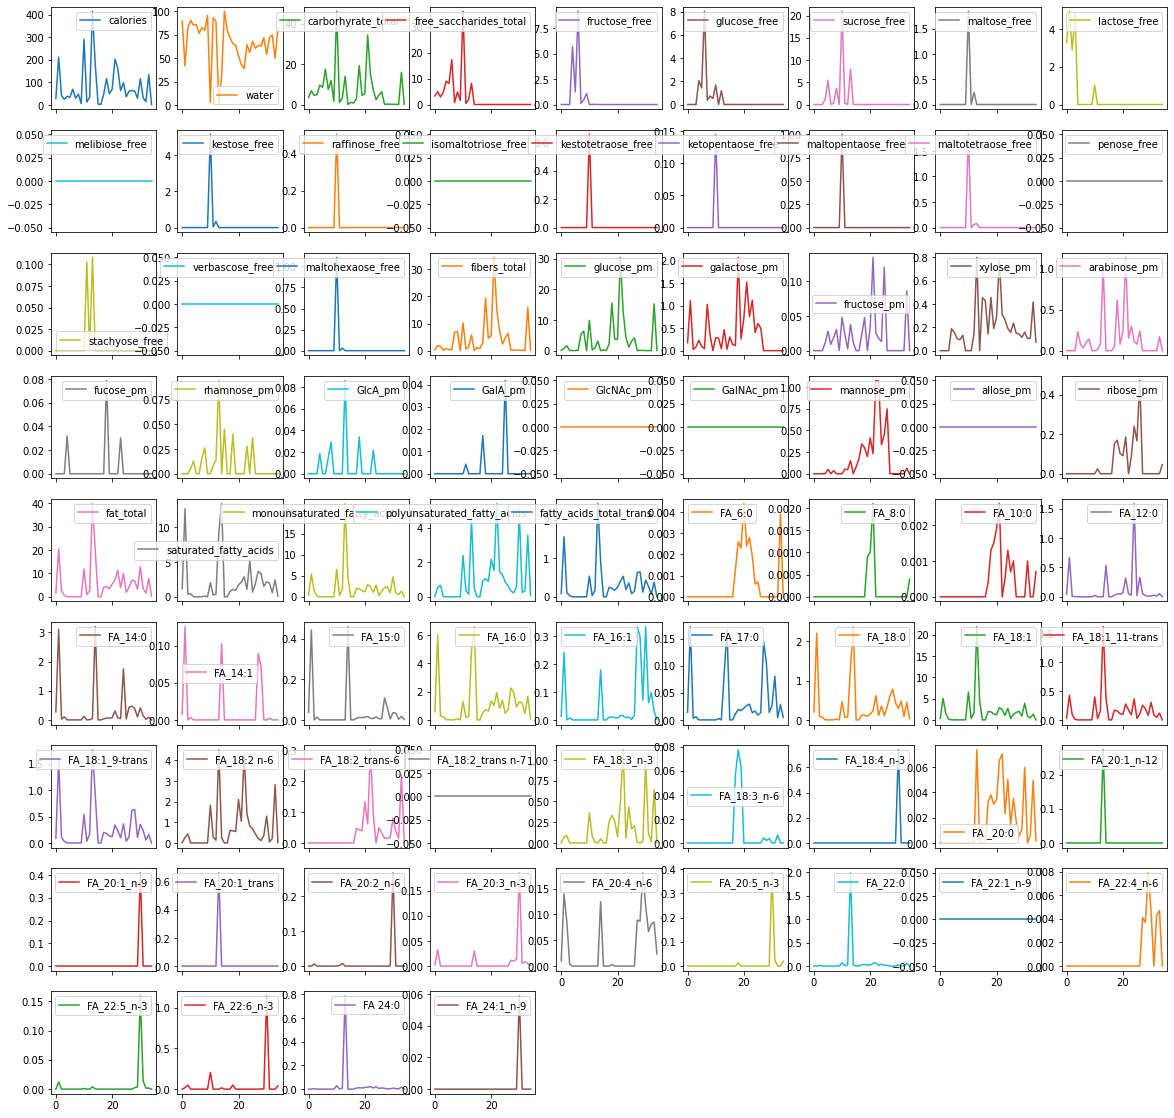

In [141]:
df.plot(subplots=True,layout=(9,9),figsize=(20,20))
plt.show()

In [142]:
#These columns have constant 0 values as seen by the graph, so dropping them out
ctd = df.columns[[10,13,18,20,32,33,35,58,71]]
df.drop(ctd,axis=1,inplace=True)

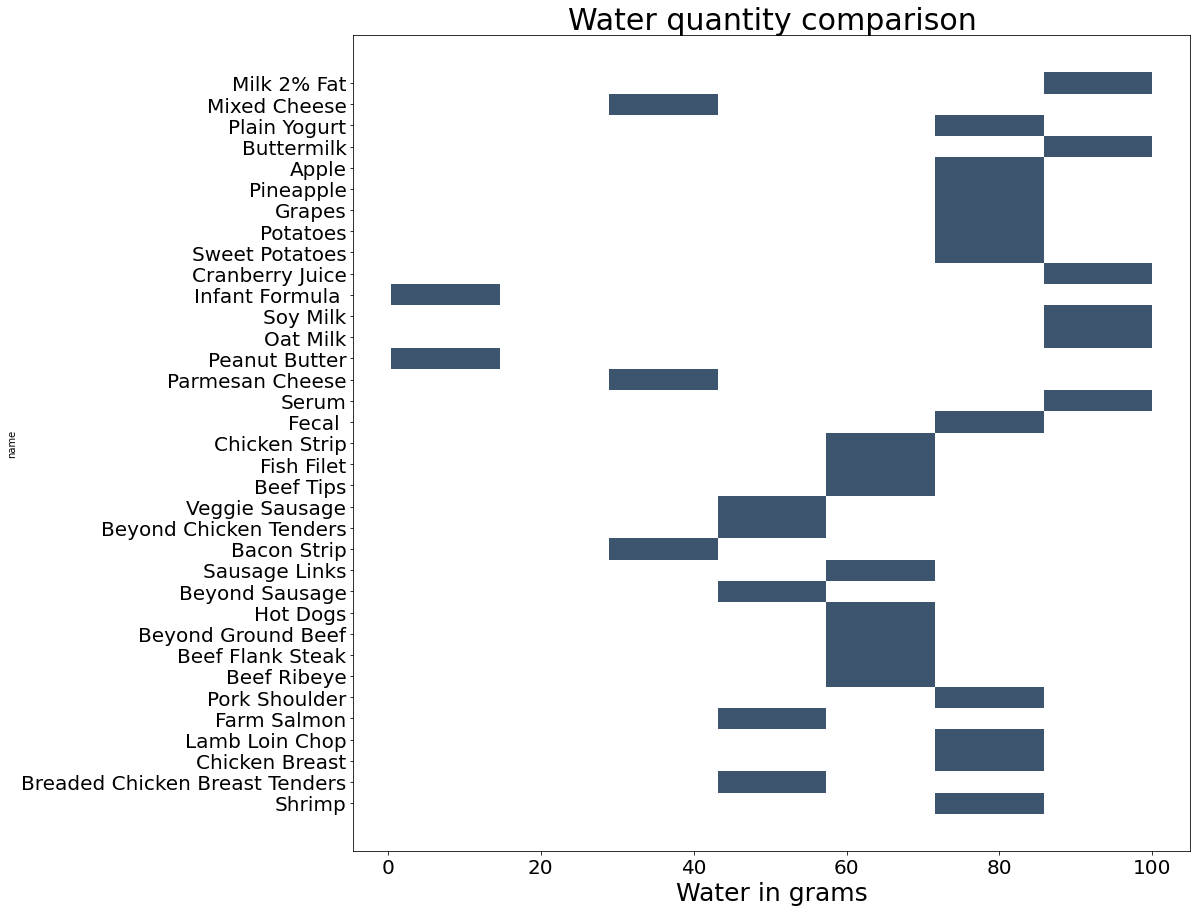

In [143]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="water",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Water in grams",fontsize=25)
plt.title("Water quantity comparison",fontsize=30)
plt.show()

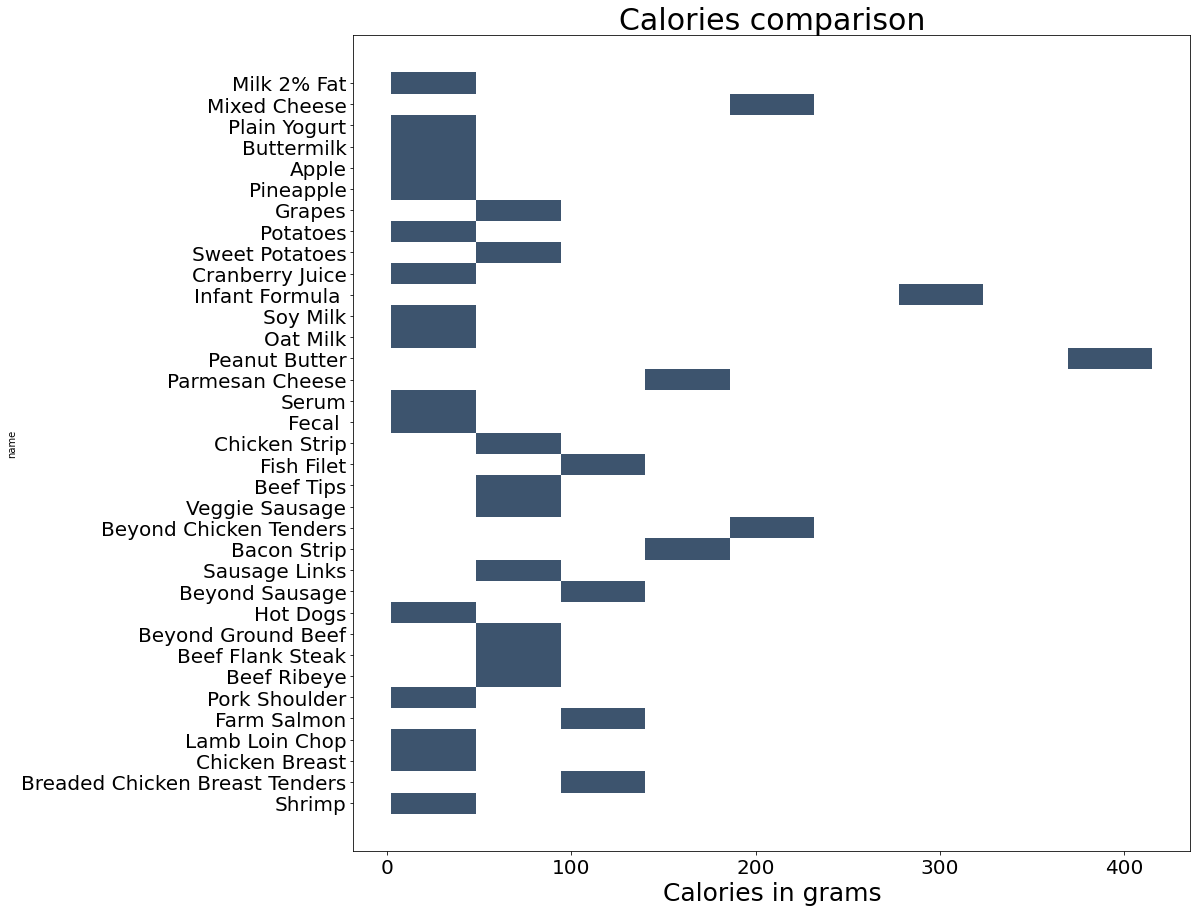

In [144]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="calories",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Calories in grams",fontsize=25)
plt.title("Calories comparison",fontsize=30)
plt.show()

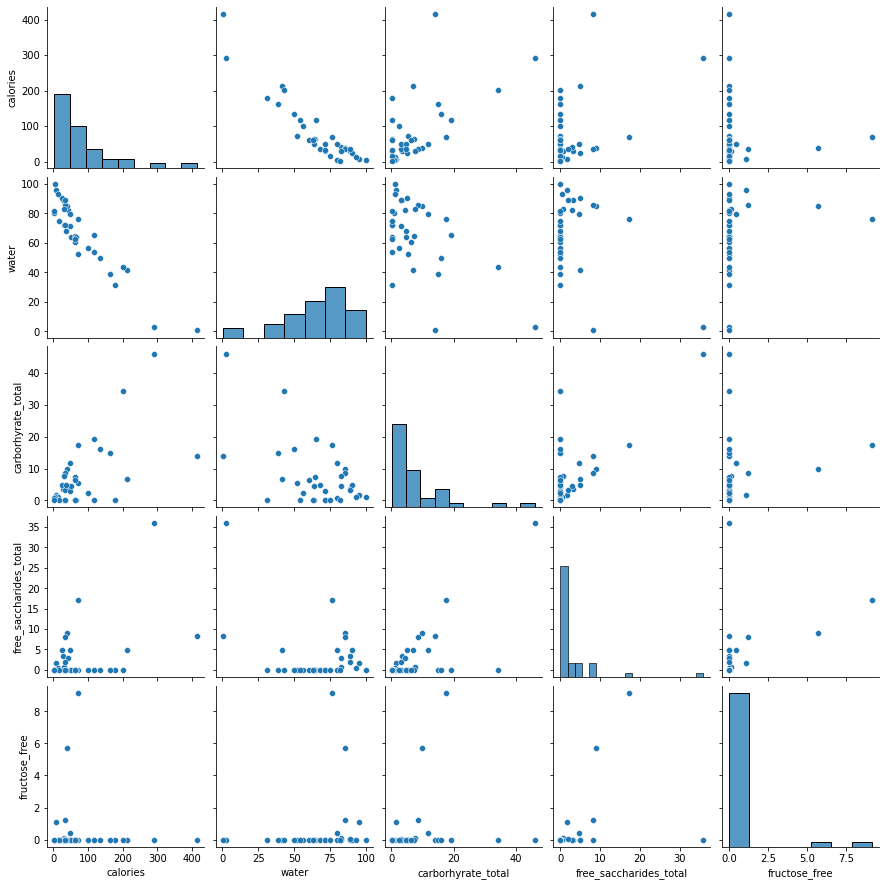

In [145]:
sns.pairplot(data=df.iloc[:,:6])

<AxesSubplot:xlabel='carborhyrate_total'>

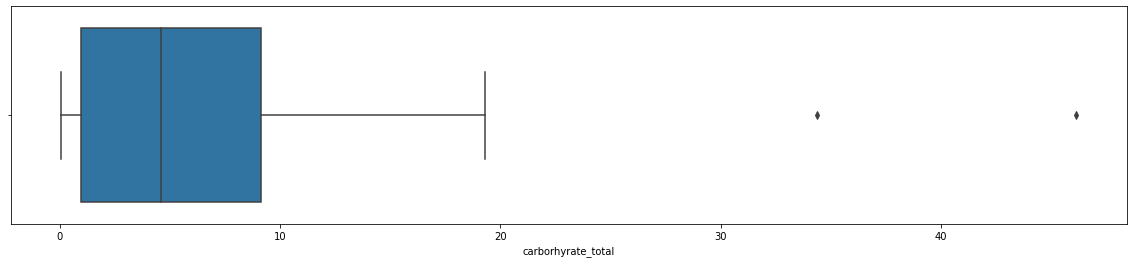

In [148]:
plt.figure(figsize=(20,4))
sns.boxplot(data=df,x="carborhyrate_total")

<AxesSubplot:xlabel='free_saccharides_total'>

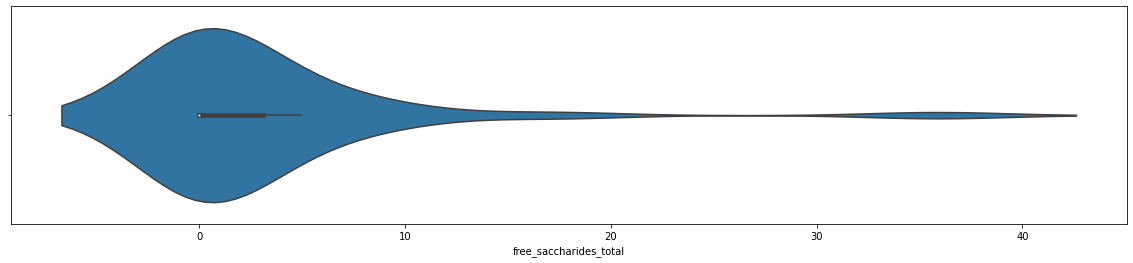

In [149]:
plt.figure(figsize=(20,4))
sns.violinplot(data=df,x="free_saccharides_total")

In [150]:
df.tail()

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:2_n-6,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
30,Farm Salmon,116.74,53.9711,0.1854,0.0,0.0,0.0,0.0,0.0,0.0,...,0.266,0.1856,0.1166,0.3841,0.0221,0.0047,0.1591,1.1461,0.0088,0.0589
31,Lamb Loin Chop,32.31,71.7306,0.1241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0056,0.0668,0.0249,0.0000,0.0000,0.0141,0.0000,0.0044,0.0000
32,Chicken Breast,15.11,74.7100,0.1260,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0088,0.0813,0.0000,0.0000,0.0043,0.0017,0.0000,0.0023,0.0000
33,Breaded Chicken Breast Tenders,134.45,49.7378,15.9825,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0049,0.0852,0.0000,0.0567,0.0047,0.0018,0.0000,0.0171,0.0000
34,Shrimp,2.58,81.6901,0.1591,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0013,0.0236,0.0203,0.0000,0.0000,0.0000,0.0399,0.0000,0.0000
